In [2]:
# Import packages
%reset -f
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy , shuffle_data
from helpers import sigmoid_derivative, gradient_update, plot_loss, prep_data
import numpy as np
import cv2

In [3]:
def train_perceptron(X, Y, X_dev, y_dev, epochs, lr):
    '''
    --------------------
    Perceptron algorithm
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/-1) training label (shape = n X 1)
    --------------------
    Output: 
    w: trained weights
    b: trained biases
    y_preds: predictions 
    --------------------
    '''
    # Initialize weights and biases
    w = np.zeros(X.shape[0])
    b = 0
    
    # History goes here
    history = {
        "weights": [w],
        "losses": [], 
        "biases": [b],
        "accuracies": [],
        "dev_accuracies": []
    }
    
    # Best accuracy
    best_accuracy = 0
    
    # Run for a fixed number of epochs
    for epoch in range(epochs):
        
        X, Y = shuffle_data(X, Y)
        
        # Do this for each example in the dataset
        for i in range(X.shape[1]):

            # Store the sample data
            x_i = X[:, i]
            y_i = Y[0][i]
            
            # Compute the prediction with the current weights
            if (np.dot(w, x_i) + b > 0): y_hat = 1
            else: y_hat = 0
            
            # Check if the prediction is correct against the labels
            # If it is correct we don't need to make any updates: we just move to the next iteration
            # If it is not correct then we do the following: 
            # 1) Update the weights and biases in the direction of the label
            if y_hat != y_i:
                w += lr*(y_i - y_hat)*x_i
                b += lr*(y_i - y_hat)
            
            
        # Get predictions on train and test
        y_train_preds = np.array([int(np.dot(w, X[:, i]) + b  > 0) for i in range(X.shape[1])])
        y_dev_preds = np.array([int(np.dot(w, X_dev[:, i]) + b  > 0) for i in range(X_dev.shape[1])])
        
        # Training accuracy                       
        accuracy = get_accuracy(Y, y_train_preds)
        dev_accuracy = get_accuracy(y_dev, y_dev_preds)
        print("Epoch {}/{}: Training_accuracy = {}, Dev. Accuracy = {}".format(epoch, epochs, accuracy, dev_accuracy))
         
        # Append results to history
        history["biases"].append(b)
        history["weights"].append(w)
        history["accuracies"].append(accuracy)
        history["dev_accuracies"].append(dev_accuracy)
        
        # Get training accuracy
        print("Epoch {}/{}: Training_accuracy = {}".format(epoch, epochs, accuracy))
    
    # Return statement
    return(history)

In [4]:
def get_perceptron_baseline(data_path, epochs, lr):
    '''
    --------------------
    Run perceptron algorithm to get a base-line
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    --------------------
    Output: 
    w: trained weights
    y_preds: predictions
    --------------------
    '''
    # Set the random seed for np.random number generator
    # This will make sure results are reproducible
    np.random.seed(132089)
    
    # Prepare data for the perceptron
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    
    # Call the perceptron training with the given epochs
    history = train_perceptron(X_train_flattened, y_train, X_dev_flattened, y_dev, epochs, lr)
    
    # Get results from history
    best_epoch, best_training_accuracy, best_dev_accuracy = get_results(history)
    
    # Plot accuracies
    plot_loss("../figs/perceptron_training_accuracy.png", history["accuracies"][:-2], 
              label='Training Accuracy')
    plot_loss("../figs/perceptron_dev_accuracy.png", history["dev_accuracies"][:-2], 
              label = "Dev. Accuracy")
    
    # Return statement
    return(best_epoch, best_training_accuracy, best_dev_accuracy, history)

In [5]:
def get_results(history):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    # Store results
    best_epoch = np.array(history["dev_accuracies"]).argmax()
    best_training_accuracy = history['accuracies'][best_epoch]
    best_dev_accuracy = history['dev_accuracies'][best_epoch]
    
    # Display results
    print(f"best training accuracy: {history['accuracies'][best_epoch]}")
    print(f"best dev accuracy: {history['dev_accuracies'][best_epoch]}")
    print(f"best epoch: {best_epoch}")
    
    return(best_epoch, best_training_accuracy, best_dev_accuracy)

Epoch 0/1000: Training_accuracy = 0.9635, Dev. Accuracy = 0.97
Epoch 0/1000: Training_accuracy = 0.9635
Epoch 1/1000: Training_accuracy = 0.9678333333333333, Dev. Accuracy = 0.974
Epoch 1/1000: Training_accuracy = 0.9678333333333333
Epoch 2/1000: Training_accuracy = 0.9338333333333333, Dev. Accuracy = 0.935
Epoch 2/1000: Training_accuracy = 0.9338333333333333
Epoch 3/1000: Training_accuracy = 0.9584166666666667, Dev. Accuracy = 0.963
Epoch 3/1000: Training_accuracy = 0.9584166666666667
Epoch 4/1000: Training_accuracy = 0.9726666666666667, Dev. Accuracy = 0.976
Epoch 4/1000: Training_accuracy = 0.9726666666666667
Epoch 5/1000: Training_accuracy = 0.8735833333333334, Dev. Accuracy = 0.885
Epoch 5/1000: Training_accuracy = 0.8735833333333334
Epoch 6/1000: Training_accuracy = 0.9698333333333333, Dev. Accuracy = 0.969
Epoch 6/1000: Training_accuracy = 0.9698333333333333
Epoch 7/1000: Training_accuracy = 0.9721666666666666, Dev. Accuracy = 0.972
Epoch 7/1000: Training_accuracy = 0.9721666666

Epoch 67/1000: Training_accuracy = 0.9803333333333333, Dev. Accuracy = 0.967
Epoch 67/1000: Training_accuracy = 0.9803333333333333
Epoch 68/1000: Training_accuracy = 0.9815, Dev. Accuracy = 0.968
Epoch 68/1000: Training_accuracy = 0.9815
Epoch 69/1000: Training_accuracy = 0.9591666666666666, Dev. Accuracy = 0.952
Epoch 69/1000: Training_accuracy = 0.9591666666666666
Epoch 70/1000: Training_accuracy = 0.9650833333333333, Dev. Accuracy = 0.951
Epoch 70/1000: Training_accuracy = 0.9650833333333333
Epoch 71/1000: Training_accuracy = 0.9370833333333334, Dev. Accuracy = 0.935
Epoch 71/1000: Training_accuracy = 0.9370833333333334
Epoch 72/1000: Training_accuracy = 0.98025, Dev. Accuracy = 0.965
Epoch 72/1000: Training_accuracy = 0.98025
Epoch 73/1000: Training_accuracy = 0.9534166666666667, Dev. Accuracy = 0.94
Epoch 73/1000: Training_accuracy = 0.9534166666666667
Epoch 74/1000: Training_accuracy = 0.9731666666666666, Dev. Accuracy = 0.962
Epoch 74/1000: Training_accuracy = 0.9731666666666666

Epoch 134/1000: Training_accuracy = 0.95875, Dev. Accuracy = 0.949
Epoch 134/1000: Training_accuracy = 0.95875
Epoch 135/1000: Training_accuracy = 0.9621666666666666, Dev. Accuracy = 0.953
Epoch 135/1000: Training_accuracy = 0.9621666666666666
Epoch 136/1000: Training_accuracy = 0.9563333333333334, Dev. Accuracy = 0.953
Epoch 136/1000: Training_accuracy = 0.9563333333333334
Epoch 137/1000: Training_accuracy = 0.93075, Dev. Accuracy = 0.928
Epoch 137/1000: Training_accuracy = 0.93075
Epoch 138/1000: Training_accuracy = 0.9818333333333333, Dev. Accuracy = 0.964
Epoch 138/1000: Training_accuracy = 0.9818333333333333
Epoch 139/1000: Training_accuracy = 0.9699166666666666, Dev. Accuracy = 0.953
Epoch 139/1000: Training_accuracy = 0.9699166666666666
Epoch 140/1000: Training_accuracy = 0.9446666666666667, Dev. Accuracy = 0.947
Epoch 140/1000: Training_accuracy = 0.9446666666666667
Epoch 141/1000: Training_accuracy = 0.9718333333333333, Dev. Accuracy = 0.953
Epoch 141/1000: Training_accuracy =

Epoch 200/1000: Training_accuracy = 0.9803333333333333, Dev. Accuracy = 0.954
Epoch 200/1000: Training_accuracy = 0.9803333333333333
Epoch 201/1000: Training_accuracy = 0.98025, Dev. Accuracy = 0.96
Epoch 201/1000: Training_accuracy = 0.98025
Epoch 202/1000: Training_accuracy = 0.9770833333333333, Dev. Accuracy = 0.96
Epoch 202/1000: Training_accuracy = 0.9770833333333333
Epoch 203/1000: Training_accuracy = 0.9796666666666667, Dev. Accuracy = 0.956
Epoch 203/1000: Training_accuracy = 0.9796666666666667
Epoch 204/1000: Training_accuracy = 0.9709166666666667, Dev. Accuracy = 0.957
Epoch 204/1000: Training_accuracy = 0.9709166666666667
Epoch 205/1000: Training_accuracy = 0.9803333333333333, Dev. Accuracy = 0.958
Epoch 205/1000: Training_accuracy = 0.9803333333333333
Epoch 206/1000: Training_accuracy = 0.98275, Dev. Accuracy = 0.959
Epoch 206/1000: Training_accuracy = 0.98275
Epoch 207/1000: Training_accuracy = 0.9666666666666667, Dev. Accuracy = 0.949
Epoch 207/1000: Training_accuracy = 0

Epoch 267/1000: Training_accuracy = 0.9771666666666666, Dev. Accuracy = 0.95
Epoch 267/1000: Training_accuracy = 0.9771666666666666
Epoch 268/1000: Training_accuracy = 0.9808333333333333, Dev. Accuracy = 0.956
Epoch 268/1000: Training_accuracy = 0.9808333333333333
Epoch 269/1000: Training_accuracy = 0.9751666666666666, Dev. Accuracy = 0.958
Epoch 269/1000: Training_accuracy = 0.9751666666666666
Epoch 270/1000: Training_accuracy = 0.9011666666666667, Dev. Accuracy = 0.902
Epoch 270/1000: Training_accuracy = 0.9011666666666667
Epoch 271/1000: Training_accuracy = 0.97675, Dev. Accuracy = 0.949
Epoch 271/1000: Training_accuracy = 0.97675
Epoch 272/1000: Training_accuracy = 0.9828333333333333, Dev. Accuracy = 0.958
Epoch 272/1000: Training_accuracy = 0.9828333333333333
Epoch 273/1000: Training_accuracy = 0.96225, Dev. Accuracy = 0.941
Epoch 273/1000: Training_accuracy = 0.96225
Epoch 274/1000: Training_accuracy = 0.9819166666666667, Dev. Accuracy = 0.958
Epoch 274/1000: Training_accuracy = 

Epoch 333/1000: Training_accuracy = 0.9825833333333334, Dev. Accuracy = 0.959
Epoch 333/1000: Training_accuracy = 0.9825833333333334
Epoch 334/1000: Training_accuracy = 0.97475, Dev. Accuracy = 0.952
Epoch 334/1000: Training_accuracy = 0.97475
Epoch 335/1000: Training_accuracy = 0.9605833333333333, Dev. Accuracy = 0.945
Epoch 335/1000: Training_accuracy = 0.9605833333333333
Epoch 336/1000: Training_accuracy = 0.9805833333333334, Dev. Accuracy = 0.952
Epoch 336/1000: Training_accuracy = 0.9805833333333334
Epoch 337/1000: Training_accuracy = 0.98125, Dev. Accuracy = 0.953
Epoch 337/1000: Training_accuracy = 0.98125
Epoch 338/1000: Training_accuracy = 0.9755833333333334, Dev. Accuracy = 0.95
Epoch 338/1000: Training_accuracy = 0.9755833333333334
Epoch 339/1000: Training_accuracy = 0.9745, Dev. Accuracy = 0.951
Epoch 339/1000: Training_accuracy = 0.9745
Epoch 340/1000: Training_accuracy = 0.9789166666666667, Dev. Accuracy = 0.953
Epoch 340/1000: Training_accuracy = 0.9789166666666667
Epoch

Epoch 399/1000: Training_accuracy = 0.9655833333333333, Dev. Accuracy = 0.952
Epoch 399/1000: Training_accuracy = 0.9655833333333333
Epoch 400/1000: Training_accuracy = 0.94075, Dev. Accuracy = 0.932
Epoch 400/1000: Training_accuracy = 0.94075
Epoch 401/1000: Training_accuracy = 0.9824166666666667, Dev. Accuracy = 0.96
Epoch 401/1000: Training_accuracy = 0.9824166666666667
Epoch 402/1000: Training_accuracy = 0.963, Dev. Accuracy = 0.944
Epoch 402/1000: Training_accuracy = 0.963
Epoch 403/1000: Training_accuracy = 0.9595, Dev. Accuracy = 0.945
Epoch 403/1000: Training_accuracy = 0.9595
Epoch 404/1000: Training_accuracy = 0.9649166666666666, Dev. Accuracy = 0.947
Epoch 404/1000: Training_accuracy = 0.9649166666666666
Epoch 405/1000: Training_accuracy = 0.9553333333333334, Dev. Accuracy = 0.944
Epoch 405/1000: Training_accuracy = 0.9553333333333334
Epoch 406/1000: Training_accuracy = 0.9806666666666667, Dev. Accuracy = 0.949
Epoch 406/1000: Training_accuracy = 0.9806666666666667
Epoch 407

Epoch 465/1000: Training_accuracy = 0.9844166666666667, Dev. Accuracy = 0.955
Epoch 465/1000: Training_accuracy = 0.9844166666666667
Epoch 466/1000: Training_accuracy = 0.9795, Dev. Accuracy = 0.952
Epoch 466/1000: Training_accuracy = 0.9795
Epoch 467/1000: Training_accuracy = 0.9761666666666666, Dev. Accuracy = 0.95
Epoch 467/1000: Training_accuracy = 0.9761666666666666
Epoch 468/1000: Training_accuracy = 0.9794166666666667, Dev. Accuracy = 0.958
Epoch 468/1000: Training_accuracy = 0.9794166666666667
Epoch 469/1000: Training_accuracy = 0.9731666666666666, Dev. Accuracy = 0.95
Epoch 469/1000: Training_accuracy = 0.9731666666666666
Epoch 470/1000: Training_accuracy = 0.9833333333333333, Dev. Accuracy = 0.952
Epoch 470/1000: Training_accuracy = 0.9833333333333333
Epoch 471/1000: Training_accuracy = 0.9805833333333334, Dev. Accuracy = 0.949
Epoch 471/1000: Training_accuracy = 0.9805833333333334
Epoch 472/1000: Training_accuracy = 0.9710833333333333, Dev. Accuracy = 0.95
Epoch 472/1000: Tr

Epoch 532/1000: Training_accuracy = 0.9846666666666667, Dev. Accuracy = 0.956
Epoch 532/1000: Training_accuracy = 0.9846666666666667
Epoch 533/1000: Training_accuracy = 0.9848333333333333, Dev. Accuracy = 0.953
Epoch 533/1000: Training_accuracy = 0.9848333333333333
Epoch 534/1000: Training_accuracy = 0.9765833333333334, Dev. Accuracy = 0.944
Epoch 534/1000: Training_accuracy = 0.9765833333333334
Epoch 535/1000: Training_accuracy = 0.9839166666666667, Dev. Accuracy = 0.95
Epoch 535/1000: Training_accuracy = 0.9839166666666667
Epoch 536/1000: Training_accuracy = 0.9628333333333333, Dev. Accuracy = 0.944
Epoch 536/1000: Training_accuracy = 0.9628333333333333
Epoch 537/1000: Training_accuracy = 0.9764166666666667, Dev. Accuracy = 0.949
Epoch 537/1000: Training_accuracy = 0.9764166666666667
Epoch 538/1000: Training_accuracy = 0.98425, Dev. Accuracy = 0.95
Epoch 538/1000: Training_accuracy = 0.98425
Epoch 539/1000: Training_accuracy = 0.9606666666666667, Dev. Accuracy = 0.944
Epoch 539/1000:

Epoch 598/1000: Training_accuracy = 0.9778333333333333, Dev. Accuracy = 0.952
Epoch 598/1000: Training_accuracy = 0.9778333333333333
Epoch 599/1000: Training_accuracy = 0.9758333333333333, Dev. Accuracy = 0.951
Epoch 599/1000: Training_accuracy = 0.9758333333333333
Epoch 600/1000: Training_accuracy = 0.9848333333333333, Dev. Accuracy = 0.955
Epoch 600/1000: Training_accuracy = 0.9848333333333333
Epoch 601/1000: Training_accuracy = 0.9821666666666666, Dev. Accuracy = 0.952
Epoch 601/1000: Training_accuracy = 0.9821666666666666
Epoch 602/1000: Training_accuracy = 0.9825, Dev. Accuracy = 0.953
Epoch 602/1000: Training_accuracy = 0.9825
Epoch 603/1000: Training_accuracy = 0.9678333333333333, Dev. Accuracy = 0.948
Epoch 603/1000: Training_accuracy = 0.9678333333333333
Epoch 604/1000: Training_accuracy = 0.95625, Dev. Accuracy = 0.94
Epoch 604/1000: Training_accuracy = 0.95625
Epoch 605/1000: Training_accuracy = 0.9841666666666666, Dev. Accuracy = 0.956
Epoch 605/1000: Training_accuracy = 0.

Epoch 664/1000: Training_accuracy = 0.9759166666666667, Dev. Accuracy = 0.945
Epoch 664/1000: Training_accuracy = 0.9759166666666667
Epoch 665/1000: Training_accuracy = 0.97825, Dev. Accuracy = 0.951
Epoch 665/1000: Training_accuracy = 0.97825
Epoch 666/1000: Training_accuracy = 0.9744166666666667, Dev. Accuracy = 0.951
Epoch 666/1000: Training_accuracy = 0.9744166666666667
Epoch 667/1000: Training_accuracy = 0.9821666666666666, Dev. Accuracy = 0.955
Epoch 667/1000: Training_accuracy = 0.9821666666666666
Epoch 668/1000: Training_accuracy = 0.9749166666666667, Dev. Accuracy = 0.952
Epoch 668/1000: Training_accuracy = 0.9749166666666667
Epoch 669/1000: Training_accuracy = 0.97525, Dev. Accuracy = 0.949
Epoch 669/1000: Training_accuracy = 0.97525
Epoch 670/1000: Training_accuracy = 0.97975, Dev. Accuracy = 0.953
Epoch 670/1000: Training_accuracy = 0.97975
Epoch 671/1000: Training_accuracy = 0.9838333333333333, Dev. Accuracy = 0.948
Epoch 671/1000: Training_accuracy = 0.9838333333333333
Ep

Epoch 729/1000: Training_accuracy = 0.98475, Dev. Accuracy = 0.955
Epoch 729/1000: Training_accuracy = 0.98475
Epoch 730/1000: Training_accuracy = 0.982, Dev. Accuracy = 0.95
Epoch 730/1000: Training_accuracy = 0.982
Epoch 731/1000: Training_accuracy = 0.9808333333333333, Dev. Accuracy = 0.952
Epoch 731/1000: Training_accuracy = 0.9808333333333333
Epoch 732/1000: Training_accuracy = 0.96475, Dev. Accuracy = 0.951
Epoch 732/1000: Training_accuracy = 0.96475
Epoch 733/1000: Training_accuracy = 0.966, Dev. Accuracy = 0.946
Epoch 733/1000: Training_accuracy = 0.966
Epoch 734/1000: Training_accuracy = 0.9811666666666666, Dev. Accuracy = 0.951
Epoch 734/1000: Training_accuracy = 0.9811666666666666
Epoch 735/1000: Training_accuracy = 0.9844166666666667, Dev. Accuracy = 0.949
Epoch 735/1000: Training_accuracy = 0.9844166666666667
Epoch 736/1000: Training_accuracy = 0.9666666666666667, Dev. Accuracy = 0.946
Epoch 736/1000: Training_accuracy = 0.9666666666666667
Epoch 737/1000: Training_accuracy

Epoch 796/1000: Training_accuracy = 0.9575, Dev. Accuracy = 0.931
Epoch 796/1000: Training_accuracy = 0.9575
Epoch 797/1000: Training_accuracy = 0.983, Dev. Accuracy = 0.95
Epoch 797/1000: Training_accuracy = 0.983
Epoch 798/1000: Training_accuracy = 0.9353333333333333, Dev. Accuracy = 0.936
Epoch 798/1000: Training_accuracy = 0.9353333333333333
Epoch 799/1000: Training_accuracy = 0.9825833333333334, Dev. Accuracy = 0.95
Epoch 799/1000: Training_accuracy = 0.9825833333333334
Epoch 800/1000: Training_accuracy = 0.9844166666666667, Dev. Accuracy = 0.95
Epoch 800/1000: Training_accuracy = 0.9844166666666667
Epoch 801/1000: Training_accuracy = 0.9796666666666667, Dev. Accuracy = 0.948
Epoch 801/1000: Training_accuracy = 0.9796666666666667
Epoch 802/1000: Training_accuracy = 0.9668333333333333, Dev. Accuracy = 0.935
Epoch 802/1000: Training_accuracy = 0.9668333333333333
Epoch 803/1000: Training_accuracy = 0.9690833333333333, Dev. Accuracy = 0.939
Epoch 803/1000: Training_accuracy = 0.969083

Epoch 862/1000: Training_accuracy = 0.9681666666666666, Dev. Accuracy = 0.945
Epoch 862/1000: Training_accuracy = 0.9681666666666666
Epoch 863/1000: Training_accuracy = 0.9793333333333333, Dev. Accuracy = 0.944
Epoch 863/1000: Training_accuracy = 0.9793333333333333
Epoch 864/1000: Training_accuracy = 0.9399166666666666, Dev. Accuracy = 0.936
Epoch 864/1000: Training_accuracy = 0.9399166666666666
Epoch 865/1000: Training_accuracy = 0.9844166666666667, Dev. Accuracy = 0.952
Epoch 865/1000: Training_accuracy = 0.9844166666666667
Epoch 866/1000: Training_accuracy = 0.98, Dev. Accuracy = 0.95
Epoch 866/1000: Training_accuracy = 0.98
Epoch 867/1000: Training_accuracy = 0.9521666666666667, Dev. Accuracy = 0.935
Epoch 867/1000: Training_accuracy = 0.9521666666666667
Epoch 868/1000: Training_accuracy = 0.9811666666666666, Dev. Accuracy = 0.952
Epoch 868/1000: Training_accuracy = 0.9811666666666666
Epoch 869/1000: Training_accuracy = 0.9854166666666667, Dev. Accuracy = 0.951
Epoch 869/1000: Trai

Epoch 927/1000: Training_accuracy = 0.9796666666666667, Dev. Accuracy = 0.954
Epoch 927/1000: Training_accuracy = 0.9796666666666667
Epoch 928/1000: Training_accuracy = 0.9644166666666667, Dev. Accuracy = 0.942
Epoch 928/1000: Training_accuracy = 0.9644166666666667
Epoch 929/1000: Training_accuracy = 0.9840833333333333, Dev. Accuracy = 0.948
Epoch 929/1000: Training_accuracy = 0.9840833333333333
Epoch 930/1000: Training_accuracy = 0.9824166666666667, Dev. Accuracy = 0.946
Epoch 930/1000: Training_accuracy = 0.9824166666666667
Epoch 931/1000: Training_accuracy = 0.967, Dev. Accuracy = 0.951
Epoch 931/1000: Training_accuracy = 0.967
Epoch 932/1000: Training_accuracy = 0.9849166666666667, Dev. Accuracy = 0.952
Epoch 932/1000: Training_accuracy = 0.9849166666666667
Epoch 933/1000: Training_accuracy = 0.9819166666666667, Dev. Accuracy = 0.952
Epoch 933/1000: Training_accuracy = 0.9819166666666667
Epoch 934/1000: Training_accuracy = 0.9845, Dev. Accuracy = 0.952
Epoch 934/1000: Training_accu

Epoch 993/1000: Training_accuracy = 0.966, Dev. Accuracy = 0.941
Epoch 993/1000: Training_accuracy = 0.966
Epoch 994/1000: Training_accuracy = 0.9755833333333334, Dev. Accuracy = 0.946
Epoch 994/1000: Training_accuracy = 0.9755833333333334
Epoch 995/1000: Training_accuracy = 0.98375, Dev. Accuracy = 0.946
Epoch 995/1000: Training_accuracy = 0.98375
Epoch 996/1000: Training_accuracy = 0.975, Dev. Accuracy = 0.951
Epoch 996/1000: Training_accuracy = 0.975
Epoch 997/1000: Training_accuracy = 0.9828333333333333, Dev. Accuracy = 0.952
Epoch 997/1000: Training_accuracy = 0.9828333333333333
Epoch 998/1000: Training_accuracy = 0.9758333333333333, Dev. Accuracy = 0.947
Epoch 998/1000: Training_accuracy = 0.9758333333333333
Epoch 999/1000: Training_accuracy = 0.9664166666666667, Dev. Accuracy = 0.943
Epoch 999/1000: Training_accuracy = 0.9664166666666667
best training accuracy: 0.9726666666666667
best dev accuracy: 0.976
best epoch: 4


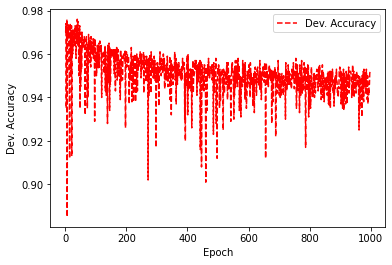

In [6]:
# Set parameters
data_path = '../setup/data'
epochs = 1000
lr = 0.6

# Call training function
best_epoch, best_accuracy, best_loss, history = get_perceptron_baseline(data_path, epochs, lr)